# Nairobi Hospital hypothyroidism clinical camp test  


Build a model that decides if the patient's symptoms suggest hypothyroidism.

**Part 1**


* Build a model to assess if the patient's symptoms mean the patient has hypothyroid or not. Take advanced models of at least 2 out of 3: random forests, Ada boosted trees, and gradient boosted trees.

* Seek to optimize each of the two models, making sure you record how the hyperparameters are configured.

* Identify which of the 2 models you have the most confidence in, and use your choice to de


**Part 2**
* Report on the data every transformation you made.

* Apply the function Polynomial, linear and rbf kernel to construct your SVM model and then evaluate its output and select the kernel that performs best. Please remember to change your parameters to boost your model's efficiency. Make sure to imagine the templates you've developed to make your life easier. Use any two functions to build the models

Hint: You may want to use decision trees to give you the most preferable features you can use. but also keep in mind that those features might not be suitable for SVM. It might be a good idea to graph them first.

-  After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version. 




### Metrics of Success

- An accuracy score greater than 90%
- An F1 score also greater than 80%


In [0]:

#Load the necessary python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#import the necessary scikit learn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [0]:
#Improving visual appearance of graphs
sns.set(rc={'figure.figsize':(13,10)})

#ensure all columns are displayed
pd.pandas.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('hypothyroid.csv')
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [4]:
# print information about the DataFrame including the index dtype and column dtypes, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
status                       3163 non-null object
age                          3163 non-null object
sex                          3163 non-null object
on_thyroxine                 3163 non-null object
query_on_thyroxine           3163 non-null object
on_antithyroid_medication    3163 non-null object
thyroid_surgery              3163 non-null object
query_hypothyroid            3163 non-null object
query_hyperthyroid           3163 non-null object
pregnant                     3163 non-null object
sick                         3163 non-null object
tumor                        3163 non-null object
lithium                      3163 non-null object
goitre                       3163 non-null object
TSH_measured                 3163 non-null object
TSH                          3163 non-null object
T3_measured                  3163 non-null object
T3                           3163 non-null 


The data types for both the numerical and categorical values are listed as 'object'. We need to convert the numerical column data type to 'float64'. The categorical column data types are also to be converted to 'categorical' data type.

In [0]:
# Creating a list of the numerical columns in the dataset.
numeric = ['age', 'FTI', 'T3', 'T4U', 'TSH', 'TT4','TBG']

for x in df.columns:
   if x in numeric:
       df[x]=pd.to_numeric(df[x])
   else:
        df[x]=df[x].astype('category')

In [16]:
df.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

In [5]:
#check for null values
df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [6]:
df.duplicated().sum()

77

In [0]:
df.drop_duplicates(keep=False,inplace=True)


In [8]:
df.duplicated().sum()

0

In [10]:
#Check for the unique values in every column

for x in df.columns :
  print('\n')                    
  print(df[x].nunique())    
  print(df[x].unique())



2
['hypothyroid' 'negative']


92
['72' '15' '24' '77' '85' '64' '20' '42' '75' '53' '59' '68' '50' '65'
 '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60' '34' '79'
 '62' '74' '32' '41' '70' '29' '5' '69' '58' '35' '51' '22' '16' '44' '39'
 '78' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '61' '49' '26' '57' '31' '90' '81' '25' '37' '76'
 '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9' '12'
 '10' '8' '7' '4' '93']


3
['M' 'F' '?']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['y' 'n']


236
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40' '126'
 '10' '530' '35' '57' '125' '80' '117' '49' '66' '8.20' '150' '65' '?'
 '18' '165' '164' '24' '90' '77' '19' '58' '213' '17' '235' '153' '13'
 '31' '109' '260' '43' '


After exploration the data:

- Has no missing values.

- Has some duplicates which we drop.

- Upon further exploration and checking for the unique values in the data it is evident that '?' is essentially a missing value.

We attempt to convert the '?' to a Nan value.

In [0]:
#Replace the ? with Nan values

df =df.replace(['?'], np.nan)


In [20]:
#check for null values
df.isnull().sum()

status                          0
age                           431
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           443
T3_measured                     0
T3                            666
TT4_measured                    0
TT4                           232
T4U_measured                    0
T4U                           231
FTI_measured                    0
FTI                           230
TBG_measured                    0
TBG                          2767
dtype: int64

Finding outliers will guide us on the best way to deal with the null values. (Fill with mean, mode, median or back-fill or forward-fill)



In [21]:
#Are there outliers in the age dataset?

Q1 = df.age.quantile(0.25)
Q3 = df.age.quantile(0.75)

IQR = Q3 - Q1

age_outliers = ((df.age < Q1 - 1.5 * IQR) | (df.age > Q3 + 1.5 * IQR))
age_outliers.value_counts()


False    3010
Name: age, dtype: int64


This means that there's no record of outliers, the best preferred method to deal with the missing values in the case of the age column is to fill using the mean

In [22]:

#Finding mean of the age column

df.age.mean()

51.06863125242342

In [0]:
#Filling the missing value entries with mean

df.age = df.age.fillna(df.age.mean())

Now let's evaluate and try to make sense of the remaining columns in order to understand what approach to take when dealing with the missing values.

In [24]:
#columns still having missing values?

df.isnull().sum()


status                          0
age                             0
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           443
T3_measured                     0
T3                            666
TT4_measured                    0
TT4                           232
T4U_measured                    0
T4U                           231
FTI_measured                    0
FTI                           230
TBG_measured                    0
TBG                          2767
dtype: int64

The general assumption for sex is that the patient did not register their gender. Assigning a patient a wrong gender would be highly inaccurate as that would affect the actual validity of the results. Thus the value ' unknown ' will be applied to any missing information.

In [25]:
#Fill a null value using fillna()  

df.sex = df.sex.replace(to_replace = np.nan, value = 'unknown')  

#Confirm the changes

df.sex.value_counts()

F          2057
M           880
unknown      73
Name: sex, dtype: int64


The other columns with missing values are:

- TSH
- T3
- TT4
- T4U
- FTI
- TBG

What are the other values?

What's TSH, T3, TT4, T4U, FTI, TBG ?

 A small background research on diagnosis of hypothyroidism:

In a blood test there are several forms of hormones that are tested to determine your thyroid status-

Thyroxine (T4): the major hormone produced by the thyroid gland. T4 gets converted to the active hormone T3 in various tissues in the body.

Triiodothyronine (T3): the active thyroid hormone, usually produced from thyroxine.

(TSH) thyroid stimulating hormone — produced by the pituitary gland that regulates thyroid function; also the best screening test to determine if the thyroid is functioning normally.

This let's us know that when hypothyroidism is checked they are hormone tests taken.


When a test wasn't conducted on a patient a missing value was recorded as '?'.

Would it be medically correct to fill the missing values with 0 ?

A low TSH and high T4 generally indicates hyperthyroidism. A high TSH and low T4 indicates primary hypothyroidism (due to a thyroid disease). A low TSH and low T4 suggest secondary hypothyroidism (due to a disease of the pituitary gland or hypothalamus of the brain).

So assigning a 0 to a missing value can essentially tamper with the results


In [26]:
#Are there outliers in the TSH dataset?

Q1 = df.TSH.quantile(0.25)
Q3 = df.TSH.quantile(0.75)

IQR = Q3 - Q1

TSH_outliers = ((df.TSH < Q1 - 1.5 * IQR) | (df.TSH > Q3 + 1.5 * IQR))
TSH_outliers.value_counts()

False    2661
True      349
Name: TSH, dtype: int64

In [27]:
#Are there outliers in the T3 dataset?

Q1 = df.T3.quantile(0.25)
Q3 = df.T3.quantile(0.75)

IQR = Q3 - Q1

T3_outliers = ((df.T3 < Q1 - 1.5 * IQR) | (df.T3 > Q3 + 1.5 * IQR))
T3_outliers.value_counts()

False    2906
True      104
Name: T3, dtype: int64

In [29]:
#Are there outliers in the TT4 dataset?

Q1 = df.TT4.quantile(0.25)
Q3 = df.TT4.quantile(0.75)

IQR = Q3 - Q1

TT4_outliers = ((df.TT4 < Q1 - 1.5 * IQR) | (df.TT4 > Q3 + 1.5 * IQR))
TT4_outliers.value_counts()

False    2834
True      176
Name: TT4, dtype: int64

In [30]:
#Are there outliers in the T4U dataset?

Q1 = df.T4U.quantile(0.25)
Q3 = df.T4U.quantile(0.75)

IQR = Q3 - Q1

T4U_outliers = ((df.T4U < Q1 - 1.5 * IQR) | (df.T4U > Q3 + 1.5 * IQR))
T4U_outliers.value_counts()

False    2811
True      199
Name: T4U, dtype: int64

In [31]:
#Are there outliers in the FTI dataset?

Q1 = df.FTI.quantile(0.25)
Q3 = df.FTI.quantile(0.75)

IQR = Q3 - Q1

FTI_outliers = ((df.FTI < Q1 - 1.5 * IQR) | (df.FTI > Q3 + 1.5 * IQR))
FTI_outliers.value_counts()

False    2772
True      238
Name: FTI, dtype: int64

In [32]:

#Are there outliers in the TBG dataset?

Q1 = df.TBG.quantile(0.25)
Q3 = df.TBG.quantile(0.75)

IQR = Q3 - Q1

TBG_outliers = ((df.TBG < Q1 - 1.5 * IQR) | (df.TBG > Q3 + 1.5 * IQR))
TBG_outliers.value_counts()

False    2992
True       18
Name: TBG, dtype: int64

Therefore, how to deal with missing values

Using the median strikes me as the best option since it is essentail to assign the patients a hormone level that's within normal range.

So replace with the median value in each category.

In [0]:

#Fill the missing value entries with the median

df.TSH = df.TSH.fillna(df.TSH.median())

df.T3 = df.T3.fillna(df.T3.median())

df.TT4 = df.TT4.fillna(df.TT4.median())

df.FTI = df.FTI.fillna(df.FTI.median())

df.T4U = df.T4U.fillna(df.T4U.median())

df.TBG = df.TBG.fillna(df.TBG.median())

In [34]:

df.isnull().sum()

#Successfully dealt with null!


status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

# Data Analysis and Preparation

Attribute Information:

The hypothyroid.csv has the following fields: 

Dataset Columns
* Age
* Sex
* on_thyroxine
* query_on_thyroxine
* on_antithyroid_medicationthyroid_surgery
* query_hypothyroid
* query_hyperthyroid
* pregnant
* sick
* tumor
* lithium
* goitre
* TSH_measured
* TSH
* T3_measured
* T3
* TT4_measured
* TT4


In [0]:

#Fill the missing value entries with the median

hyp.TSH = hyp.TSH.fillna(hyp.TSH.median())

hyp.T3 = hyp.T3.fillna(hyp.T3.median())

hyp.TT4 = hyp.TT4.fillna(hyp.TT4.median())

hyp.FTI = hyp.FTI.fillna(hyp.FTI.median())

hyp.T4U = hyp.T4U.fillna(hyp.T4U.median())

hyp.TBG = hyp.TBG.fillna(hyp.TBG.median())

In [39]:
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

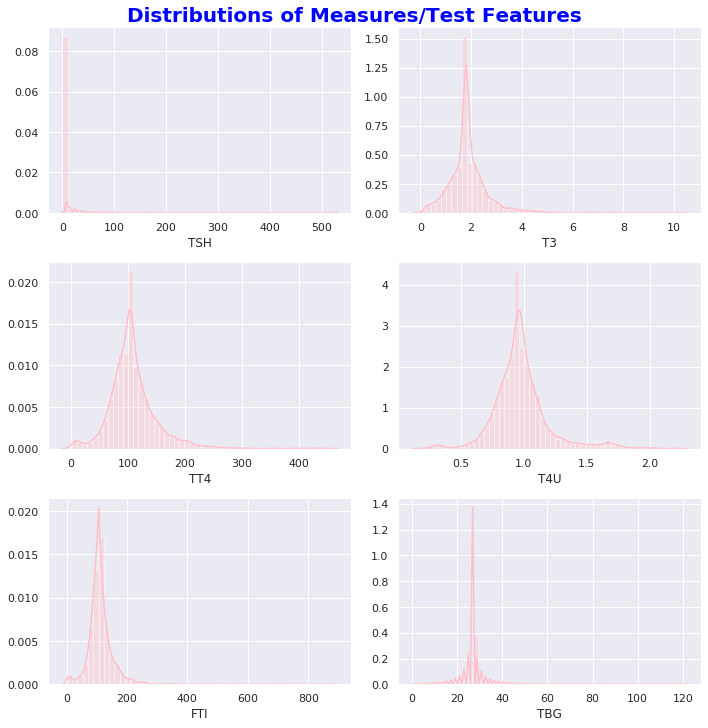

In [37]:

# Histograms of the numerical columns
# these are columns which represent measures or thyroid tests.
# First we create a list containing all the measures columns

measure_columns = ['TSH','T3','TT4','T4U','FTI','TBG']

sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=3, ncols = 2, figsize = (10,10))
fig.suptitle('Distributions of Measures/Test Features', y= 1.01, color = 'blue', fontsize = 20, weight = 'bold')

for ax, data, name in zip(axes.flatten(), df, measure_columns):
  sns.distplot(df[name], ax = ax, kde = True, color = 'pink')
plt.tight_layout()
plt.show()

Pre-Processing

Thereafter, we map the categorical values to numbers to allow for the modelling process.



In [41]:
df.head(10)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,27.0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,27.0
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,27.0
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,27.0
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,27.0
5,hypothyroid,85.0,F,f,f,f,f,t,f,f,f,f,f,f,y,138.0,y,1.1,y,27.0,y,1.19,y,23.0,n,27.0
6,hypothyroid,64.0,F,f,f,f,t,f,f,f,f,f,f,f,y,7.7,y,1.3,y,54.0,y,0.86,y,63.0,n,27.0
7,hypothyroid,72.0,F,f,f,f,f,f,f,f,f,f,f,f,y,21.0,y,1.9,y,34.0,y,1.05,y,32.0,n,27.0
8,hypothyroid,20.0,F,f,f,f,f,t,f,f,f,f,f,f,y,92.0,n,1.8,y,39.0,y,1.21,y,32.0,n,27.0
9,hypothyroid,42.0,F,f,f,f,f,f,f,f,f,f,f,f,y,48.0,n,1.8,y,7.6,y,1.02,y,7.5,n,27.0


In [0]:
categoricals = ['sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery','query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','lithium','goitre','TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured']

df = pd.get_dummies(df, columns=['sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery','query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','lithium','goitre','TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'])

In [43]:
df.head(10)

,status,age,TSH,T3,TT4,T4U,FTI,TBG,sex_F,sex_M,sex_unknown,on_thyroxine_f,on_thyroxine_t,query_on_thyroxine_f,query_on_thyroxine_t,on_antithyroid_medication_f,on_antithyroid_medication_t,thyroid_surgery_f,thyroid_surgery_t,query_hypothyroid_f,query_hypothyroid_t,query_hyperthyroid_f,query_hyperthyroid_t,pregnant_f,pregnant_t,sick_f,sick_t,tumor_f,tumor_t,lithium_f,lithium_t,goitre_f,goitre_t,TSH_measured_n,TSH_measured_y,T3_measured_n,T3_measured_y,TT4_measured_n,TT4_measured_y,T4U_measured_n,T4U_measured_y,FTI_measured_n,FTI_measured_y,TBG_measured_n,TBG_measured_y
0,hypothyroid,72.0,30.0,0.6,15.0,1.48,10.0,27.0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
1,hypothyroid,15.0,145.0,1.7,19.0,1.13,17.0,27.0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
2,hypothyroid,24.0,0.0,0.2,4.0,1.00,0.0,27.0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
3,hypothyroid,24.0,430.0,0.4,6.0,1.04,6.0,27.0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
4,hypothyroid,77.0,7.3,1.2,57.0,1.28,44.0,27.0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
5,hypothyroid,85.0,138.0,1.1,27.0,1.19,23.0,27.0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
6,hypothyroid,64.0,7.7,1.3,54.0,0.86,63.0,27.0,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
7,hypothyroid,72.0,21.0,1.9,34.0,1.05,32.0,27.0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
8,hypothyroid,20.0,92.0,1.8,39.0,1.21,32.0,27.0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0
9,hypothyroid,42.0,48.0,1.8,7.6,1.02,7.5,27.0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0



Part 1 (RandomForest/AdaBoost)
Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid. You should make use of at least 2 out of 3 advanced models : Random forests, Ada boosted trees, and gradient boosted trees.

Try and optimize each of the 2 models, making sure to document how you've set up your hyperparameters.

-Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction.

### Random Forest


In [44]:
#Load our dataset after pre-processing

df.head()

,status,age,TSH,T3,TT4,T4U,FTI,TBG,sex_F,sex_M,sex_unknown,on_thyroxine_f,on_thyroxine_t,query_on_thyroxine_f,query_on_thyroxine_t,on_antithyroid_medication_f,on_antithyroid_medication_t,thyroid_surgery_f,thyroid_surgery_t,query_hypothyroid_f,query_hypothyroid_t,query_hyperthyroid_f,query_hyperthyroid_t,pregnant_f,pregnant_t,sick_f,sick_t,tumor_f,tumor_t,lithium_f,lithium_t,goitre_f,goitre_t,TSH_measured_n,TSH_measured_y,T3_measured_n,T3_measured_y,TT4_measured_n,TT4_measured_y,T4U_measured_n,T4U_measured_y,FTI_measured_n,FTI_measured_y,TBG_measured_n,TBG_measured_y
0,hypothyroid,72.0,30.0,0.6,15.0,1.48,10.0,27.0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
1,hypothyroid,15.0,145.0,1.7,19.0,1.13,17.0,27.0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
2,hypothyroid,24.0,0.0,0.2,4.0,1.00,0.0,27.0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
3,hypothyroid,24.0,430.0,0.4,6.0,1.04,6.0,27.0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
4,hypothyroid,77.0,7.3,1.2,57.0,1.28,44.0,27.0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0


In [0]:

#Define the dependent variable and independent variable ; what's your target variable?

X = df.iloc[:,1:44]
y = df.iloc[:,0]

In [0]:

#Split the data into train and test sets ; train with 70% of the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [0]:
#Feature Scaling

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [51]:

#Train your model

classifier = RandomForestClassifier(n_estimators = 100, random_state = 40, min_samples_split = 20, max_depth = 5)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=40, verbose=0,
                       warm_start=False)

In [0]:

# Predicting the test set results

y_pred = classifier.predict(X_test)

In [53]:

#Confusion matrix 

cm = confusion_matrix(y_test, y_pred)
cm

array([[ 22,  12],
       [  2, 867]])

In [54]:

#Accuracy

accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9844961240310077

In [55]:

print('The accuracy of the Random Forest Classifier is',accuracy*100,'%')

The accuracy of the Random Forest Classifier is 98.44961240310077 %


Visualization of a random forest tree



In [56]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


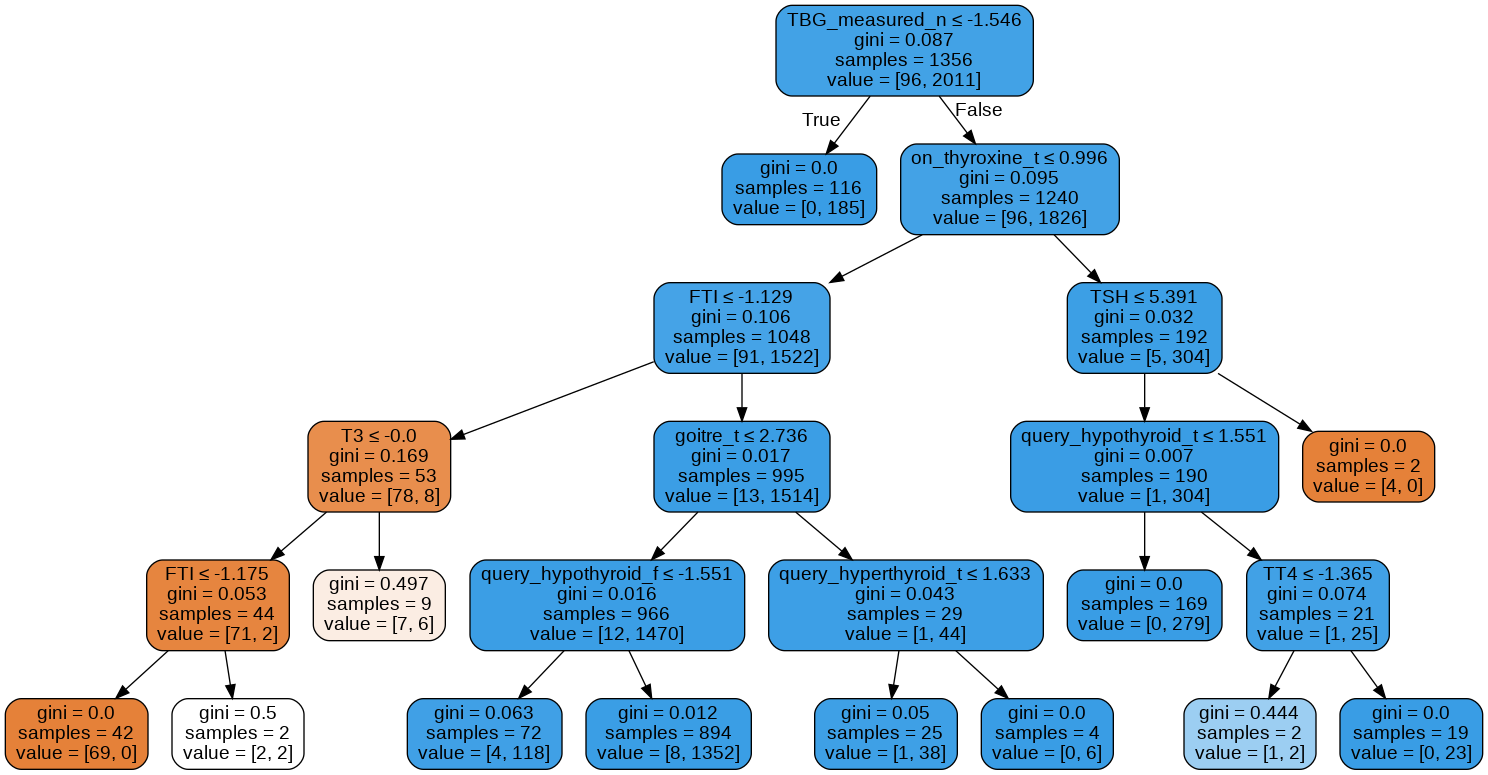

In [57]:
# Visualizing tree number 20

y_pred = classifier.predict(X_test)
dot_data = StringIO()

# picking a specific tree from the forest; tree  number 10
tree = classifier.estimators_[10]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hypothyroid_Test.png')
Image(graph.create_png())

In [58]:
# Feature importance

# Get numerical feature importances
importances = list(tree.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]

# Sorting the values in descending order, since we want to see the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: FTI                  Importance: 0.9
Variable: TSH                  Importance: 0.05
Variable: T3                   Importance: 0.03
Variable: on_thyroxine_t       Importance: 0.01
Variable: TBG_measured_n       Importance: 0.01
Variable: age                  Importance: 0.0
Variable: TT4                  Importance: 0.0
Variable: T4U                  Importance: 0.0
Variable: TBG                  Importance: 0.0
Variable: sex_F                Importance: 0.0
Variable: sex_M                Importance: 0.0
Variable: sex_unknown          Importance: 0.0
Variable: on_thyroxine_f       Importance: 0.0
Variable: query_on_thyroxine_f Importance: 0.0
Variable: query_on_thyroxine_t Importance: 0.0
Variable: on_antithyroid_medication_f Importance: 0.0
Variable: on_antithyroid_medication_t Importance: 0.0
Variable: thyroid_surgery_f    Importance: 0.0
Variable: thyroid_surgery_t    Importance: 0.0
Variable: query_hypothyroid_f  Importance: 0.0
Variable: query_hypothyroid_t  Importance:

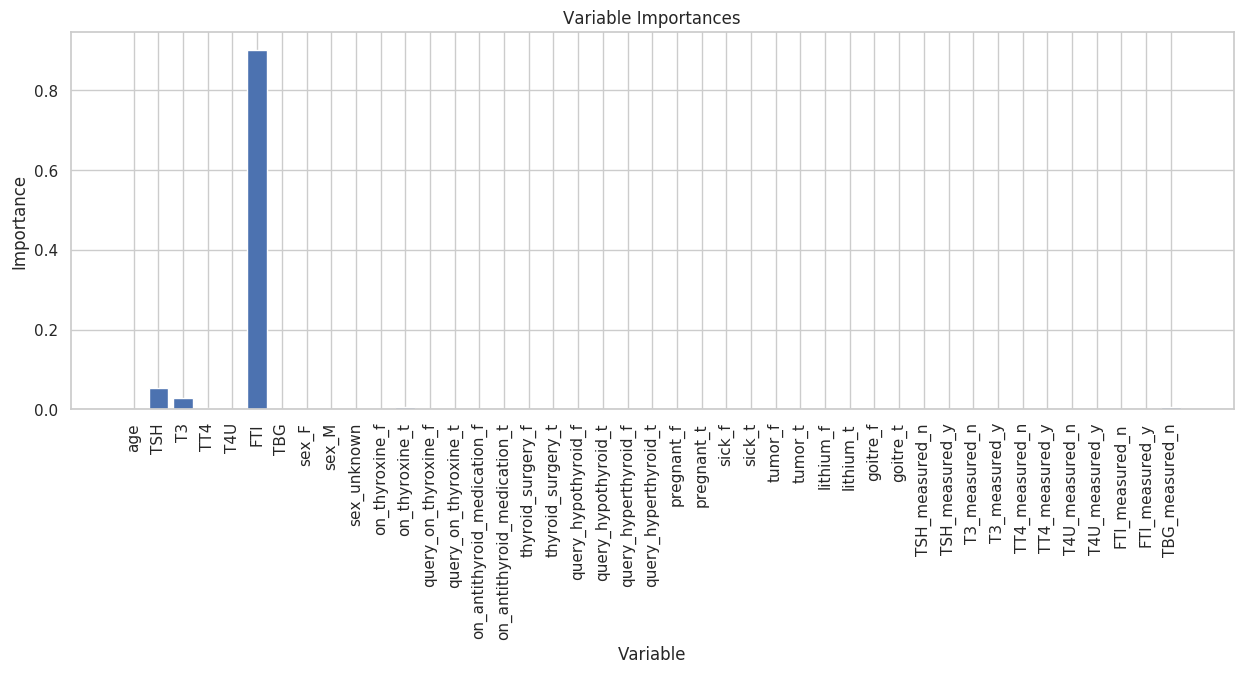

In [59]:
# list of Features and their importances for plotting
# Specifying the grid size and display for easier viewing

sns.set(style = 'whitegrid')

plt.figure(dpi = 100, figsize = (15,5))

x_values = list(range(len(importances)))

# Making a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Labels and ticks for x axis
plt.xticks(x_values, X.columns, rotation= 'vertical')

# Labeling y axis and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

Optimization of Random Forest



In [60]:
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,
                  200,
                  300,
                  400,
                  500,
                  600,
                  700,
                  800,
                  900,
                  1000,
                  1100,
                  1200,
                  1300,
                  1400,
                  1500,
                  1600,
                  1700,
                  1800,
                  1900,
                  2000]}


In [0]:

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42,n_jobs = -1)

In [0]:

# Fit the random search model
rf_random.fit(X_train,y_train)

In [65]:
rf_random.best_params_


{'bootstrap': False,
 'max_depth': 70,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 600}

In [66]:

forestOpt = RandomForestClassifier(bootstrap=True,
                                  max_depth=70,
                                  min_samples_leaf=4,
                                  min_samples_split=10,
                                  n_estimators=400
                                  )

modelOpt = forestOpt.fit(X_train, y_train)

y_pred = modelOpt.predict(X_test)

#Find the accuracy

acc = accuracy_score(y_test,y_pred)
acc

0.9856035437430787

In [67]:
print('The accuracy of the Random Forest Classifier after hyperparameter tuning is',acc*100,'%')


The accuracy of the Random Forest Classifier after hyperparameter tuning is 98.56035437430786 %


The accuracy of the model seems to go down after hyperparamter tuning.



## AdaBoost Classifier


In [0]:

#Split the dataset and define the target variable and independent variables

X = df.iloc[:,1:44]
y = df.iloc[:,0]

In [0]:
#Split into test and train data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [72]:

#Train the model using the AdaBoost Classifier

classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=100)

classifier.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [0]:

#Prediction

predictions = classifier.predict(X_test)

In [75]:

#Confusion matrix

confusion_matrix(y_test, predictions)

array([[ 25,   6],
       [  5, 717]])

In [76]:
#Accuracy

accuracy = accuracy_score(y_test,predictions)

accuracy

0.9853917662682603

In [77]:
print('The accuracy of the AdaBoost Classifier is',accuracy*100,'%')


The accuracy of the AdaBoost Classifier is 98.53917662682603 %


Conclusion of part 1

The accuracy of the AdaBoost Classifier is 98.70466321243524 %

The accuracy of the Random Forest Classifier is 98.48812095032397 %

The accuracy of the AdaBoost classifier is higher the Random Forest Classifier.




# Part 2 (Support Vector Machines)

- Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best.

- Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.

- Hint: You may want to use decision trees to give you the most preferable features you can use. but also keep in mind that those features might not be suitable for SVM. It might be a good idea to graph them first.

- After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version.

SVMs requires careful preprocessing of the data and tuning of the parameters. This is why, these days, most people instead use tree-based models such as random forests or gradient boosting (which require little or no preprocessing) in many applications.

Parameters to tune:

- Kernel
- C
- Gamma


**rbf kernel**



In [0]:
svc_model = SVC(kernel= 'rbf',gamma='scale',C=1.0)


In [83]:
svc_model.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_predict = svc_model.predict(X_test)


In [85]:
print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

 hypothyroid       0.91      0.68      0.78        31
    negative       0.99      1.00      0.99       722

    accuracy                           0.98       753
   macro avg       0.95      0.84      0.88       753
weighted avg       0.98      0.98      0.98       753



The average precision is 0.91



**Linear** **Kernel**



In [0]:
svc_model = SVC(kernel= 'linear',gamma='scale',C=1.0)


In [90]:
svc_model.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_predict = svc_model.predict(X_test)


In [92]:
print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

 hypothyroid       0.91      0.68      0.78        31
    negative       0.99      1.00      0.99       722

    accuracy                           0.98       753
   macro avg       0.95      0.84      0.88       753
weighted avg       0.98      0.98      0.98       753



The average precision is 0.98



**Polynomial** **Kernel**


In [0]:
svc_model = SVC(kernel= 'poly',gamma='scale',C=1.0)


In [96]:
svc_model.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_predict = svc_model.predict(X_test)


In [98]:
print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

 hypothyroid       0.94      0.48      0.64        31
    negative       0.98      1.00      0.99       722

    accuracy                           0.98       753
   macro avg       0.96      0.74      0.81       753
weighted avg       0.98      0.98      0.97       753



The linear kernel shows a higher level of precision than the other kernels with a macro avg and weighted avg higher than the other kernels.

In [99]:

#What features are of higher importance in the SVM model

svm = LinearSVC()
svm = svm.fit(X_train, y_train)
pred = svm.predict(X_test)
cf = svm.coef_

cf


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([[ 0.00627619, -0.0094743 ,  0.20749968, -0.00208684, -0.03850258,
         0.01515591, -0.01236568,  0.133198  ,  0.01334649, -0.14223683,
        -0.16122096,  0.16552862, -0.00527788,  0.00958554, -0.18383871,
         0.18814637,  0.08220555, -0.07789789, -0.09443817,  0.09874583,
         0.01579047, -0.01148281, -0.03097069,  0.03527835, -0.16408569,
         0.16839335, -0.02214169,  0.02644935, -0.01044043,  0.01474809,
         0.09806909, -0.09376143,  0.20214876, -0.1978411 , -0.08291655,
         0.08722421,  0.01328436, -0.0089767 ,  0.01328436, -0.0089767 ,
         0.01328436, -0.0089767 , -0.0180694 ]])

In [100]:
X_train.columns


Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG', 'sex_F', 'sex_M',
       'sex_unknown', 'on_thyroxine_f', 'on_thyroxine_t',
       'query_on_thyroxine_f', 'query_on_thyroxine_t',
       'on_antithyroid_medication_f', 'on_antithyroid_medication_t',
       'thyroid_surgery_f', 'thyroid_surgery_t', 'query_hypothyroid_f',
       'query_hypothyroid_t', 'query_hyperthyroid_f', 'query_hyperthyroid_t',
       'pregnant_f', 'pregnant_t', 'sick_f', 'sick_t', 'tumor_f', 'tumor_t',
       'lithium_f', 'lithium_t', 'goitre_f', 'goitre_t', 'TSH_measured_n',
       'TSH_measured_y', 'T3_measured_n', 'T3_measured_y', 'TT4_measured_n',
       'TT4_measured_y', 'T4U_measured_n', 'T4U_measured_y', 'FTI_measured_n',
       'FTI_measured_y', 'TBG_measured_n'],
      dtype='object')

SVM after parameter tuning



In [0]:
svc_model = SVC(kernel= 'linear',gamma='scale',C=1.0)


In [102]:
svc_model.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_predict = svc_model.predict(X_test)


In [104]:
print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

 hypothyroid       0.91      0.68      0.78        31
    negative       0.99      1.00      0.99       722

    accuracy                           0.98       753
   macro avg       0.95      0.84      0.88       753
weighted avg       0.98      0.98      0.98       753



The average precision remains the same at 0.98